In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [14]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df_first = pd.read_csv("/home/mona/diabetes.csv")
df = df_first.rename(columns ={"Pregnancies":"pregnant",'Glucose':'glucose','BloodPressure':'bp','SkinThickness':'skin','Insulin':'insulin','BMI':'bmi',"DiabetesPedigreeFunction":"pedigree","age":"Age","Outcome":"Label"})

In [15]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'Age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y =df.Label # Target variable

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2, random_state = 1)
 
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [24]:
from sklearn import metrics
 
# make predictions
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
metrics.confusion_matrix(predicted, Y_test)

array([[88, 21],
       [11, 34]])

In [30]:
model_score = model.score(X_test, Y_test)
model_score

0.7922077922077922

In [27]:
y_predictProb = model.predict_proba(X_test)
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8350780532598714

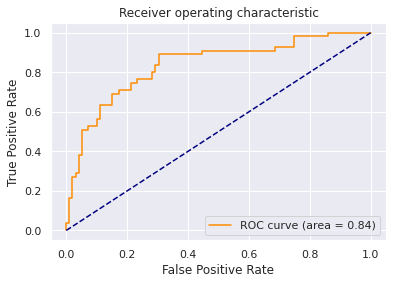

In [28]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Example 2: Iris Dataset

In [31]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [32]:
# Prepare the data data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [33]:
## SPLIT THE DATA INTO TRAINING AND TESTING DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Text(89.18, 0.5, 'Predicted')

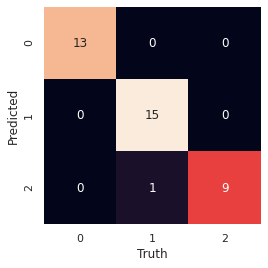

In [34]:
# Init the Gaussian ClassifieR
model = GaussianNB()

# Train the model 
model.fit(X_train, y_train)

# Predict Output 
pred = model.predict(X_test)

# Plot Confusion Matrix
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')